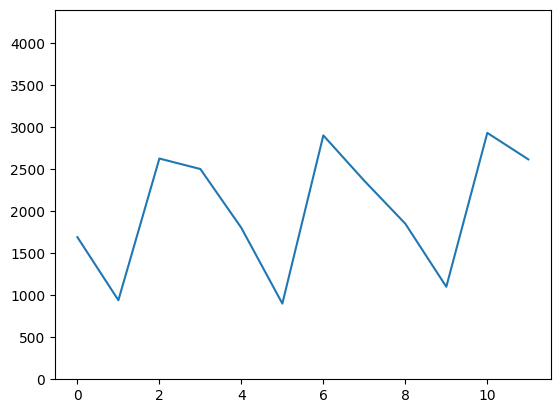

In [14]:
years = [1, 2, 3]
quarter = [1, 2, 3, 4]
data = [1690, 940, 2625, 2500,
        1800, 900, 2900, 2360,
        1850, 1100, 2930, 2615]

import matplotlib.pyplot as plt

plt.ylim(bottom = 0, top = max(data)*1.5)
plt.plot(data)

In [15]:
import numpy as np
def create_dummies(data, quarter):
    dummies = np.zeros((len(data), len(quarter)))

    for i in range(len(dummies)):
        dummies[i][i%len(quarter)] = 1

    return dummies[:, :-1]


dummies = create_dummies(data, quarter)

In [17]:
from docplex.mp.model import Model
m = Model()

b_0 = m.continuous_var(name = 'Intercept', lb = -10e6)
b_x = m.continuous_var_list(len(quarter)-1, lb = -10e6, name = 'Slope')

mse = []
for i in range(len(data)):
    mse.append((b_0 + b_x @ dummies[i] - data[i])**2)

m.minimize(sum(mse))

In [18]:
solution = m.solve(log_output = True)

Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Number of nonzeros in lower triangle of Q = 3
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.00 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 4
  Integer space required    = 4
  Total non-zeros in factor = 10
  Total FP ops to factor    = 30
Tried aggregator 1 time.
QP Presolve added 0 rows and 4 columns.
Reduced QP has 4 rows, 8 columns, and 11 nonzeros.
Reduced QP objective Q matrix has 4 nonzeros.
Presolve time = 0.03 sec. (0.00 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 4
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 4
  Integer space required    = 4
  Total non-zeros in factor = 10
  Total FP o

In [19]:
print(solution)

solution for: docplex_model3
objective: 124933
status: OPTIMAL_SOLUTION(2)
Intercept=2491.667
Slope_0=-711.667
Slope_1=-1511.667
Slope_2=326.667

